In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Make Initial Dataframe

In [54]:
chat_df = pd.read_fwf('_chat.txt', header = None)

chat_df

,0
0,"[9/28/21, 7:07:33 PM] Tennis: ‎Messages and ca..."
1,"[10/11/21, 10:40:01 PM] ‎‎‪04587 changed their..."
2,"[3/14/22, 6:14:43 PM] 23454: @phonenumber1 @ph..."
3,"[3/14/22, 6:14:59 PM] 01123: I'll check the co..."
4,"[3/14/22, 6:15:05 PM] 01123: My brother got th..."
...,...
800,"[7/15/22, 4:58:26 PM] 81673: Lol I have no ide..."
801,"[7/15/22, 4:58:45 PM] 23454: Yeah I gave it my..."
802,"[7/15/22, 4:58:50 PM] 81673: Lol"
803,"[7/15/22, 4:59:20 PM] 38372: Lmfao"


Remove Calls

In [55]:
chat_df = chat_df[~(chat_df[0].str.contains(' started a video call') | chat_df[0].str.contains(' started a call'))]
chat_df.reset_index(drop=True, inplace=True)
chat_df

,0
0,"[9/28/21, 7:07:33 PM] Tennis: ‎Messages and ca..."
1,"[10/11/21, 10:40:01 PM] ‎‎‪04587 changed their..."
2,"[3/14/22, 6:14:43 PM] 23454: @phonenumber1 @ph..."
3,"[3/14/22, 6:14:59 PM] 01123: I'll check the co..."
4,"[3/14/22, 6:15:05 PM] 01123: My brother got th..."
...,...
800,"[7/15/22, 4:58:26 PM] 81673: Lol I have no ide..."
801,"[7/15/22, 4:58:45 PM] 23454: Yeah I gave it my..."
802,"[7/15/22, 4:58:50 PM] 81673: Lol"
803,"[7/15/22, 4:59:20 PM] 38372: Lmfao"


Reorganize Columns to contain the Message, Date and Time on Different Columns while Removing the Other Columns

In [56]:
chat_df[['Datetime', 'Message']] = chat_df[0].str.split('] ', n = 1, expand = True)
chat_df['Datetime'] = pd.to_datetime(chat_df.Datetime, format='[%m/%d/%y, %I:%M:%S %p', errors='coerce')
chat_df.drop(columns=[col for col in chat_df if col not in ['Message', 'Datetime']], inplace=True)
chat_df = chat_df.dropna()
chat_df.reset_index(drop=True, inplace=True)
chat_df

,Datetime,Message
0,2021-09-28 19:07:33,Tennis: ‎Messages and calls are end-to-end enc...
1,2021-10-11 22:40:01,‎‎‪04587 changed their phone number to a new n...
2,2022-03-14 18:14:43,23454: @phonenumber1 @phonenumber2 are the ne...
3,2022-03-14 18:14:59,01123: I'll check the courts
4,2022-03-14 18:15:05,01123: My brother got the courts
...,...,...
779,2022-07-15 16:58:26,81673: Lol I have no idea how to spell it
780,2022-07-15 16:58:45,23454: Yeah I gave it my best shot
781,2022-07-15 16:58:50,81673: Lol
782,2022-07-15 16:59:20,38372: Lmfao


Add User Column, Removing All Messages Not Sent By A User

In [57]:
chat_df = chat_df[chat_df['Message'].str.contains(':') == True]
chat_df[['User', 'Message']] = chat_df['Message'].str.split(': ', n = 1, expand = True)
chat_df.reset_index(drop=True, inplace=True)
chat_df

/Users/sriyaankvad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Datetime,Message,User
0,2021-09-28 19:07:33,‎Messages and calls are end-to-end encrypted. ...,Tennis
1,2022-03-14 18:14:43,@phonenumber1 @phonenumber2 are the nets up i...,23454
2,2022-03-14 18:14:59,I'll check the courts,01123
3,2022-03-14 18:15:05,My brother got the courts,01123
4,2022-03-14 18:15:07,Also,01123
...,...,...,...
775,2022-07-15 16:58:26,Lol I have no idea how to spell it,81673
776,2022-07-15 16:58:45,Yeah I gave it my best shot,23454
777,2022-07-15 16:58:50,Lol,81673
778,2022-07-15 16:59:20,Lmfao,38372


Extract Group Chat Name

In [58]:
group_chat_name = chat_df.iloc[0]['User'] # This is the message WhatsApp sends about end to end encryption
chat_df = chat_df.iloc[1:,:] # Removes the message WhatsApp sends about end to end encryption
chat_df.reset_index(drop=True, inplace=True)
group_chat_name

'Tennis'

Extract Start and End Date for Data

In [59]:
start_date = chat_df.iloc[0]['Datetime'].strftime('%Y-%m-%d')
end_date = chat_df.iloc[-1]['Datetime'].strftime('%Y-%m-%d')
start_date, end_date

('2022-03-14', '2022-07-15')

Find the User Who Sent the Most Messages

In [60]:
user_df = chat_df.groupby('User', as_index = False).count().sort_values(by = 'Message', ascending=False)
user_df.drop(columns = ['Datetime'], inplace = True)
user_df = user_df.rename(columns = {'User': 'User', 'Message': 'Messages Sent'})
user_df['Percentages'] = np.round(user_df['Messages Sent'].divide(other = (chat_df.shape[0]/100)), 1)
user_df.reset_index(drop=True, inplace=True)
user_df

,User,Messages Sent,Percentages
0,23454,209,26.8
1,38372,180,23.1
2,01123,170,21.8
3,81673,93,11.9
4,04587,78,10.0
5,34673,36,4.6
6,23466,10,1.3
7,09343,3,0.4


Plot This Data

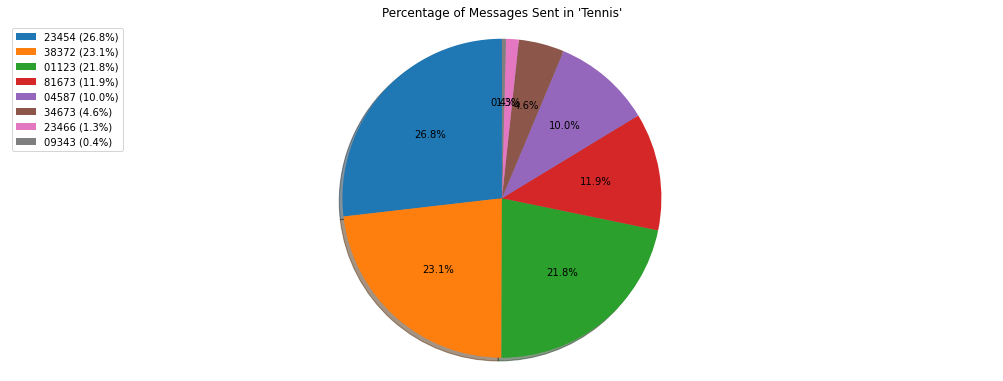

In [61]:
fig, ax = plt.subplots(figsize=(15,6))
fig.tight_layout(pad=3.0)
ax.pie(user_df['Percentages'], labels=['' for x in range(len(user_df))], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title(f'Percentage of Messages Sent in \'{group_chat_name}\'')
plt.legend(loc="upper left", labels = user_df['User'] + ' (' + user_df['Percentages'].astype(str) + '%)'  )
plt.show()

Find the Hour the Group Chat is Most Active

In [62]:
hour_df = chat_df.copy()
hour_df['Hour'] = hour_df['Datetime'].apply(lambda datetime : datetime.hour)
hour_df = hour_df.groupby('Hour', as_index = False).count()
hour_df.drop(columns = ['Datetime', 'User'], inplace = True)
hour_df = hour_df.rename(columns = {'Hour': 'Hour', 'Message': 'Messages Sent'})

Convert Hour into 12 Hour Format

In [63]:
def num_to_hour(hour):
    if hour == 0:
        return '12 AM'
    elif hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour-12} PM'

hour_df['Hour'] = hour_df['Hour'].apply(lambda hour: num_to_hour(hour))
hour_df

,Hour,Messages Sent
0,1 AM,1
1,9 AM,10
2,10 AM,34
3,11 AM,3
4,12 PM,62
5,1 PM,59
6,2 PM,34
7,3 PM,121
8,4 PM,166
9,5 PM,205


Plot This Data

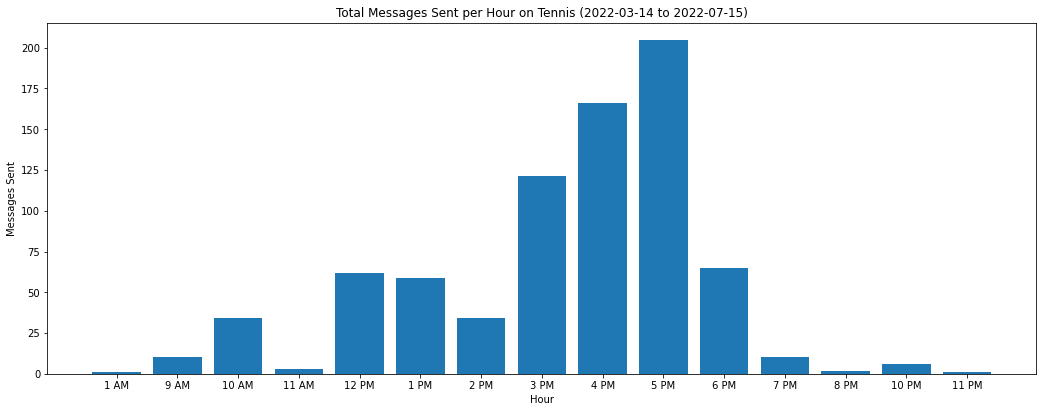

In [64]:
fig, ax = plt.subplots(figsize=(15,6))
fig.tight_layout(pad=3.0)
plt.bar(hour_df['Hour'], 
        hour_df['Messages Sent'])
plt.xlabel('Hour')
plt.ylabel('Messages Sent')
plt.title(f'Total Messages Sent per Hour on {group_chat_name} ({start_date} to {end_date})')
plt.show()

Show Changes in Group Chat Activity Each Month

In [65]:
month_df = chat_df.copy()
num_to_month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_df['Month'] = month_df['Datetime'].apply(lambda datetime : f'{num_to_month[datetime.month]}-{datetime.year}')
month_df = month_df.groupby('Month', sort = False, as_index = False).count()
month_df.drop(columns = ['Datetime', 'User'], inplace = True)
month_df = month_df.rename(columns = {'Month': 'Month', 'Message': 'Messages Sent'})
month_df

,Month,Messages Sent
0,March-2022,112
1,April-2022,75
2,May-2022,400
3,June-2022,11
4,July-2022,181


Plot This Data

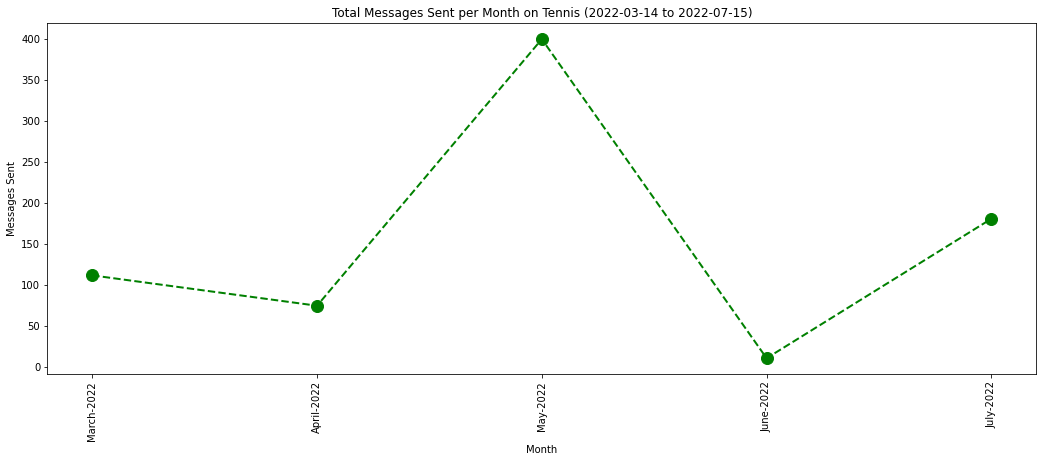

In [66]:
fig, ax = plt.subplots(figsize=(15,6))
fig.tight_layout(pad=3.0)
plt.plot(month_df['Month'], month_df['Messages Sent'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('Month')
plt.ylabel('Messages Sent')
plt.xticks(rotation = 90)
plt.title(f'Total Messages Sent per Month on {group_chat_name} ({start_date} to {end_date})')
plt.show()